In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

In [2]:
def plotCNNPerformanceMetrics(performance_file):
    #performance_file = "../../results/opt-cnn-performance-metrics-summary-" + str(resolution) + "px.csv"
#     resolution = performance_file.split('-')[-1].split('px')[0]
    resolution = performance_file.split('-')[-10].split('px')[0]
    co = ["Pr_Im", "PrPo_Im", "Pr_PoIm", "Pr_Po_Im"]
    if 'test' in performance_file:
        model_name = performance_file.split('-')[-14].split('px')[0]
    else:
        model_name = performance_file.split('-')[-12].split('px')[0]
    dfm = pd.read_csv(performance_file)
    num_epochs = dfm.epoch.max()
    #melted_df = dfm.melt(id_vars = ["epoch", "Scenario"], value_vars = ["loss", "accuracy", "val_loss", "val_accuracy"], var_name = "metric", value_name = "value")
    melted_df = dfm.melt(id_vars = ["epoch", "Scenario"], value_vars = ["loss", "accuracy", "val_loss", "val_accuracy", "val_f1", "val_precision", "val_recall"], var_name = "metric", value_name = "value")
    melted_df["metric_type"] = None
    melted_df["phase"] = "Validation"
    melted_df.loc[melted_df.metric.isin(["loss", "val_loss"]), "metric_type"] = "Loss"
    melted_df.loc[melted_df.metric.isin(["accuracy", "val_accuracy", "val_f1", "val_precision", "val_recall"]), "metric_type"] = "Performance"
    melted_df.loc[melted_df.metric.isin(["loss", "accuracy"]), "phase"] = "Training"
    #print(melted_df.metric.unique())

    sns.set_style("whitegrid")
    g = sns.FacetGrid(melted_df, col="Scenario", row="metric_type", col_order = co, sharey = False, hue_kws = {"linestyle" : ["-","--"]})
    g.map_dataframe(sns.lineplot, x = "epoch", y = "value", ci=None, hue = "metric", style="phase",  style_order=["Validation", "Training"], alpha=.85,
                    #palette= sns.color_palette("Set2", n_colors=8) 
                   )
    g.set_axis_labels("Epoch", "", fontsize = 16)
    g.add_legend(bbox_to_anchor=(1.02, .75), loc=2,fontsize=16) 
    ## Customize legend
    g._legend.texts[0].set_text("")
    g._legend.texts[1].set_text("Train. loss") #Data
    g._legend.texts[2].set_text("Test loss")
    g._legend.texts[3].set_text("")    
    g._legend.texts[4].set_text("")    
    g._legend.texts[5].set_text("")    
    g._legend.texts[6].set_text("Train. accuracy")    
    g._legend.texts[7].set_text("Test accuracy")    
    g._legend.texts[8].set_text("Avg. F1")    
    g._legend.texts[9].set_text("Avg. precision")    
    g._legend.texts[10].set_text("Avg. recall")    
    g._legend.legendHandles[4].set_linewidth(0)
    g._legend.legendHandles[5].set_linewidth(0)    
    g._legend.legendHandles[6].set_linestyle('--')    
    g._legend.legendHandles[1].set_linestyle('--')    

    # g._legend._legend_box.sep = 5
    axes = g.axes
    for row, axlist in enumerate(axes):
        if row==0:
            for col, axis in enumerate(axes[row]):
                if "resnet" or "inception" in model_name:
                    axes[row, col].set_ylim(0.2, 5)
                else:        
                    axes[row, col].set_ylim(0, 2)#.75 
                if not('base') in model_name:
                    axes[row, col].set_xlim(1, num_epochs)
                if 'base' in model_name:
                    axes[row, col].xaxis.set_major_locator(tkr.MultipleLocator(2))
                axes[row, col].set_title("Scenario: " + str(axes[row, col].title).split("Scenario = ")[1].split(")")[0].split("\'")[0],
                                        fontsize=16)
                if col != 0:
                    axes[row, col].get_yaxis().set_ticklabels([])
                else:
                    axes[row, col].set_ylabel("Loss", fontsize=16)
        elif row==1:
            for col, axis in enumerate(axes[row]):
#                 axes[row, col].set_xlim(0.2, 1.05)
                axes[row, col].set_ylim(0, 1.05)
                if not("base") in model_name:
                    axes[row, col].set_xlim(1, num_epochs)
                axes[row, col].set_title("")
                if col != 0:
                    axes[row, col].get_yaxis().set_ticklabels([])
                else:
                    axes[row, col].set_ylabel("Performance", fontsize=16)
    g.fig.tight_layout()
    g.savefig("../../figures/" + model_name + "-performance-metrics-" + str(resolution) + "px-plot.png", dpi=180)
    return(dfm)

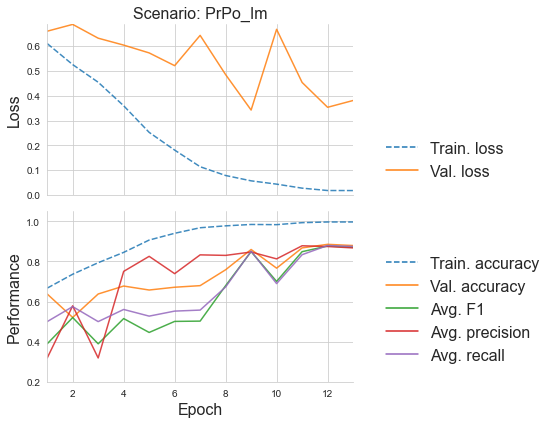

In [3]:
PERFORMANCE_FILE  = "../../results/opt-cnn-performance-metrics-summary-128px.csv"
d = plotCNNPerformanceMetrics(PERFORMANCE_FILE)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,val_f1,val_recall,val_precision,Scenario,epoch
0,0,1.543852,0.642857,0.654235,0.669173,0.400901,0.500000,0.334586,PrPo_Im,1
1,1,0.784658,0.669173,0.634400,0.669173,0.400901,0.500000,0.334586,PrPo_Im,2
2,2,0.752994,0.627820,171.794434,0.669173,0.400901,0.500000,0.334586,PrPo_Im,3
3,3,0.791354,0.675752,137.696777,0.330827,0.248588,0.500000,0.165414,PrPo_Im,4
4,4,0.741272,0.646617,557.390808,0.669173,0.400901,0.500000,0.334586,PrPo_Im,5
...,...,...,...,...,...,...,...,...,...,...
195,195,0.549163,0.782895,3.972593,0.661654,0.265460,0.329588,0.222222,Pr_Po_Im,46
196,196,0.486690,0.803571,1.894289,0.661654,0.357849,0.371587,0.479024,Pr_Po_Im,47
197,197,0.488968,0.800752,2.035661,0.541353,0.344218,0.361679,0.360812,Pr_Po_Im,48
198,198,0.415347,0.835526,2.530274,0.669173,0.322492,0.357182,0.669251,Pr_Po_Im,49


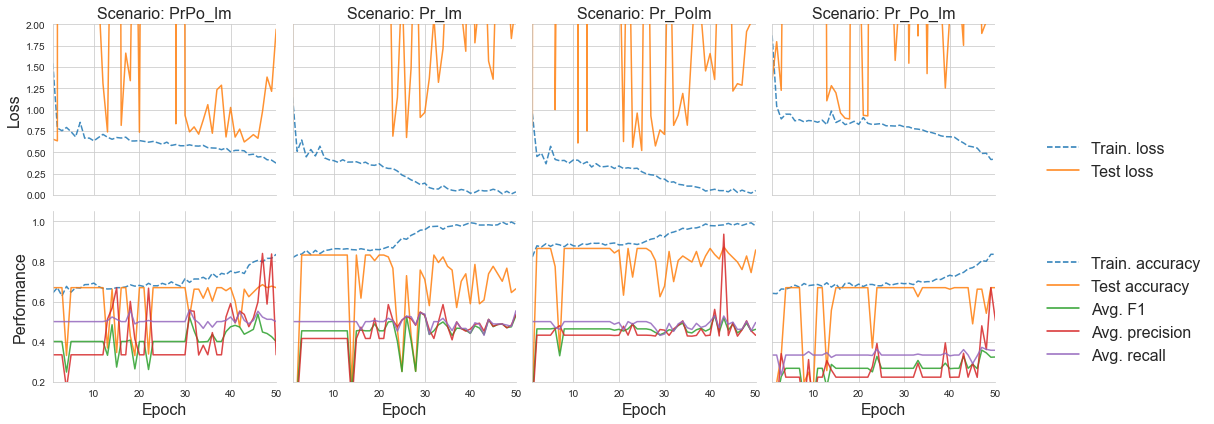

In [19]:
RESNET_PERFORMANCE_TESTING_MODE  = "../../results/test-opt-cnn-performance-metrics-summary-resnet50-w-252-px-h252-px-03-Aug-2021-16-17-45.csv"
plotCNNPerformanceMetrics(RESNET_PERFORMANCE_TESTING_MODE)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,val_f1,val_recall,val_precision,Scenario,epoch
0,0,0.576029,0.800234,5.734849,0.831776,0.454082,0.500000,0.415888,Pr_Im,1
1,1,0.481418,0.836449,4.290155,0.831776,0.454082,0.500000,0.415888,Pr_Im,2
2,2,0.450905,0.850467,0.472767,0.803738,0.623807,0.616105,0.634783,Pr_Im,3
3,3,0.435029,0.842290,1.538803,0.831776,0.454082,0.500000,0.415888,Pr_Im,4
4,4,0.396904,0.843458,1.093681,0.467290,0.443776,0.591136,0.554478,Pr_Im,5
5,5,0.398808,0.857477,0.777197,0.831776,0.454082,0.500000,0.415888,Pr_Im,6
6,6,0.383682,0.853972,0.831945,0.831776,0.454082,0.500000,0.415888,Pr_Im,7
7,7,0.342482,0.858645,1.669446,0.831776,0.454082,0.500000,0.415888,Pr_Im,8
8,8,0.334808,0.858645,0.903521,0.831776,0.454082,0.500000,0.415888,Pr_Im,9
9,9,0.303007,0.872664,1.340428,0.831776,0.454082,0.500000,0.415888,Pr_Im,10


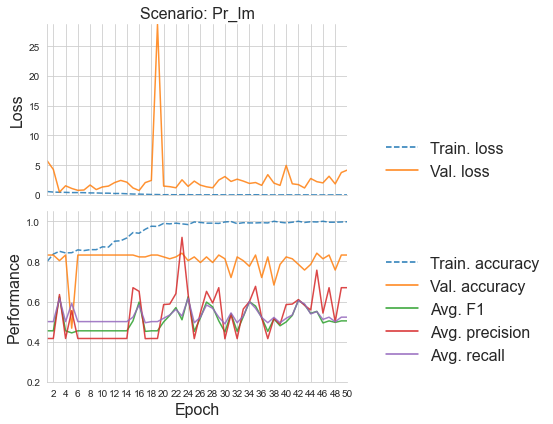

In [13]:
BASE_PERFORMANCE_TESTING_MODE_NON_OPT  = "../../results/test-opt-cnn-performance-metrics-summary-base-w-252-px-h252-px-03-Aug-2021-11-34-24.csv"
plotCNNPerformanceMetrics(BASE_PERFORMANCE_TESTING_MODE_NON_OPT)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,val_f1,val_recall,val_precision,Scenario,epoch
0,0,0.780720,0.638158,6.312048,0.669173,0.400901,0.500000,0.334586,PrPo_Im,1
1,1,0.676411,0.661654,21.682978,0.669173,0.400901,0.500000,0.334586,PrPo_Im,2
2,2,0.610713,0.675752,3.918718,0.676692,0.424937,0.511364,0.837121,PrPo_Im,3
3,3,0.614819,0.686090,3.773045,0.669173,0.400901,0.500000,0.334586,PrPo_Im,4
4,4,0.596154,0.707707,2.877229,0.669173,0.400901,0.500000,0.334586,PrPo_Im,5
5,5,0.593588,0.681391,1.272687,0.669173,0.400901,0.500000,0.334586,PrPo_Im,6
6,6,0.585714,0.686090,2.928554,0.669173,0.400901,0.500000,0.334586,PrPo_Im,7
7,7,0.573273,0.702068,0.930102,0.631579,0.537441,0.540858,0.553050,PrPo_Im,8
8,8,0.563468,0.716165,2.526623,0.669173,0.400901,0.500000,0.334586,PrPo_Im,9
9,9,0.528047,0.734962,1.160329,0.669173,0.400901,0.500000,0.334586,PrPo_Im,10


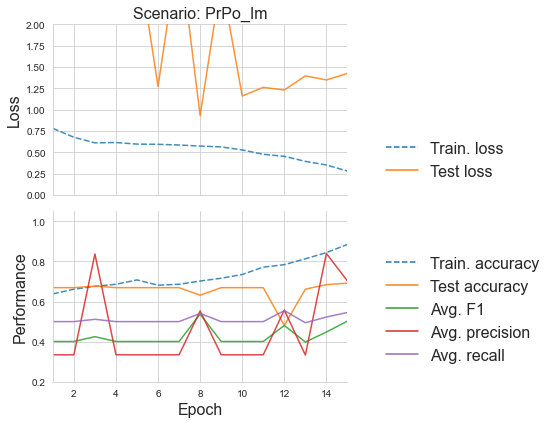

In [34]:
BASE_PERFORMANCE_TESTING_MODE_NON_OPT  = "../../results/test-opt-cnn-performance-metrics-summary-base-w-252-px-h252-px-06-Aug-2021-05-16-25.csv"
plotCNNPerformanceMetrics(BASE_PERFORMANCE_TESTING_MODE_NON_OPT)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,val_f1,val_recall,val_precision,Scenario,epoch
0,0,0.970355,0.665414,0.717819,0.330827,0.248588,0.500000,0.165414,PrPo_Im,1
1,1,0.671890,0.680451,1.029241,0.669173,0.400901,0.500000,0.334586,PrPo_Im,2
2,2,0.672813,0.676692,4.844982,0.330827,0.248588,0.500000,0.165414,PrPo_Im,3
3,3,0.632192,0.681391,498.461456,0.330827,0.248588,0.500000,0.165414,PrPo_Im,4
4,4,0.688452,0.671053,325.482635,0.330827,0.248588,0.500000,0.165414,PrPo_Im,5
...,...,...,...,...,...,...,...,...,...,...
195,195,0.791611,0.697368,1.787463,0.669173,0.267267,0.333333,0.223058,Pr_Po_Im,46
196,196,0.793605,0.689850,1.173070,0.593985,0.293821,0.323106,0.275845,Pr_Po_Im,47
197,197,0.789091,0.681391,1.001484,0.639098,0.259939,0.318352,0.219638,Pr_Po_Im,48
198,198,0.780767,0.691729,1.119761,0.669173,0.267267,0.333333,0.223058,Pr_Po_Im,49


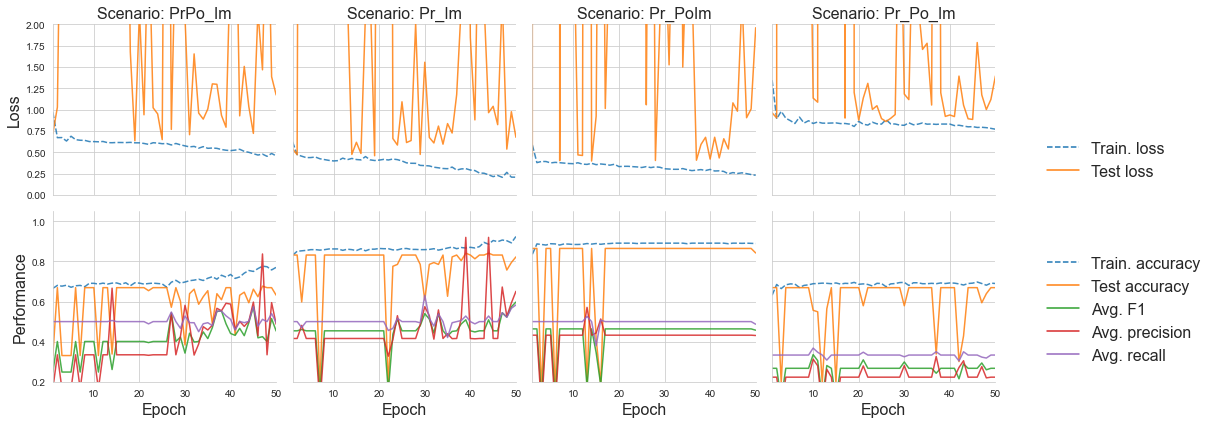

In [30]:
INCEPTION_TESTING_MODE  = "../../results/test-opt-cnn-performance-metrics-summary-inception_v3-w-252-px-h252-px-04-Aug-2021-21-20-17.csv"
plotCNNPerformanceMetrics(INCEPTION_TESTING_MODE)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,val_f1,val_recall,val_precision,Scenario,epoch
0,0,1.543852,0.642857,0.654235,0.669173,0.400901,0.500000,0.334586,PrPo_Im,1
1,1,0.784658,0.669173,0.634400,0.669173,0.400901,0.500000,0.334586,PrPo_Im,2
2,2,0.752994,0.627820,171.794434,0.669173,0.400901,0.500000,0.334586,PrPo_Im,3
3,3,0.791354,0.675752,137.696777,0.330827,0.248588,0.500000,0.165414,PrPo_Im,4
4,4,0.741272,0.646617,557.390808,0.669173,0.400901,0.500000,0.334586,PrPo_Im,5
...,...,...,...,...,...,...,...,...,...,...
195,195,0.549163,0.782895,3.972593,0.661654,0.265460,0.329588,0.222222,Pr_Po_Im,46
196,196,0.486690,0.803571,1.894289,0.661654,0.357849,0.371587,0.479024,Pr_Po_Im,47
197,197,0.488968,0.800752,2.035661,0.541353,0.344218,0.361679,0.360812,Pr_Po_Im,48
198,198,0.415347,0.835526,2.530274,0.669173,0.322492,0.357182,0.669251,Pr_Po_Im,49


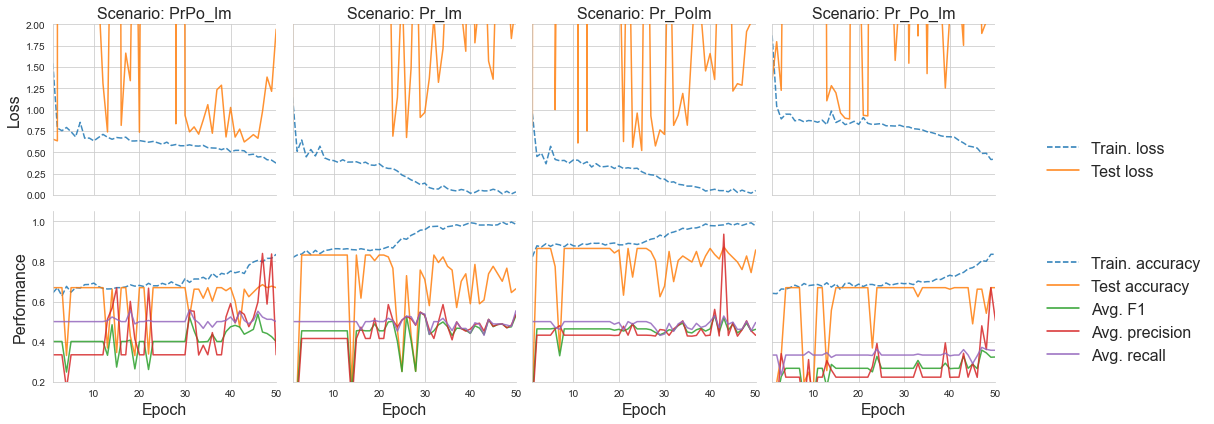

In [31]:
RESNET_TESTING_MODE  = "../../results/test-opt-cnn-performance-metrics-summary-resnet50-w-252-px-h252-px-03-Aug-2021-16-17-45.csv"
plotCNNPerformanceMetrics(RESNET_TESTING_MODE)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,val_f1,val_recall,val_precision,Scenario,epoch
0,0,1.097863,0.649436,0.665594,0.669173,0.400901,0.5,0.334586,PrPo_Im,1
1,1,0.697754,0.656015,731.679504,0.330827,0.248588,0.5,0.165414,PrPo_Im,2
2,2,0.682798,0.675752,48.968445,0.669173,0.400901,0.5,0.334586,PrPo_Im,3
3,3,0.684195,0.668233,1068.964966,0.669173,0.400901,0.5,0.334586,PrPo_Im,4
4,4,0.678964,0.676692,5.459500,0.669173,0.400901,0.5,0.334586,PrPo_Im,5
5,5,0.655051,0.671053,163.302261,0.669173,0.400901,0.5,0.334586,PrPo_Im,6
6,6,0.659202,0.679511,131.188263,0.330827,0.248588,0.5,0.165414,PrPo_Im,7
7,7,0.627172,0.687030,0.651478,0.669173,0.400901,0.5,0.334586,PrPo_Im,8
8,8,0.665630,0.658835,0.666822,0.669173,0.400901,0.5,0.334586,PrPo_Im,9
9,9,0.646361,0.684211,0.676685,0.669173,0.400901,0.5,0.334586,PrPo_Im,10


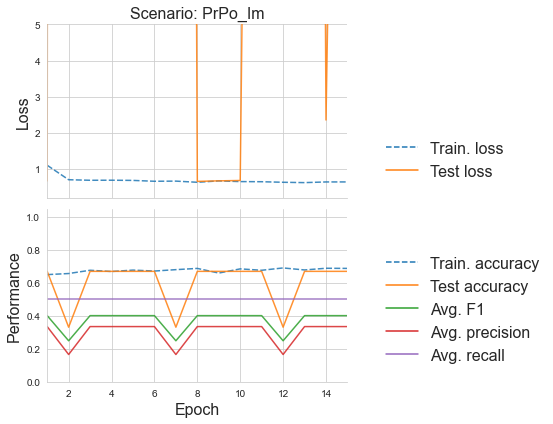

In [40]:
INCEPTION_PATIENCE_7_TESTING_MODE  = "../../results/test-opt-cnn-performance-metrics-summary-inception_v3-w-252-px-h252-px-patience-7-12-Aug-2021-18-43-18.csv"
plotCNNPerformanceMetrics(INCEPTION_PATIENCE_7_TESTING_MODE)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,val_f1,val_recall,val_precision,Scenario,epoch
0,0,1.617225,0.617481,5.959252,0.669173,0.400901,0.500000,0.334586,PrPo_Im,1
1,1,0.811024,0.629699,0.974295,0.669173,0.400901,0.500000,0.334586,PrPo_Im,2
2,2,0.732740,0.662594,114.676750,0.669173,0.400901,0.500000,0.334586,PrPo_Im,3
3,3,0.778096,0.648496,1.605815,0.624060,0.506090,0.518003,0.526950,PrPo_Im,4
4,4,0.816601,0.670113,13630.644531,0.330827,0.248588,0.500000,0.165414,PrPo_Im,5
5,5,0.662141,0.679511,73.342400,0.330827,0.248588,0.500000,0.165414,PrPo_Im,6
6,6,0.699628,0.670113,0.969108,0.669173,0.400901,0.500000,0.334586,PrPo_Im,7
7,7,0.650966,0.670113,0.949982,0.669173,0.400901,0.500000,0.334586,PrPo_Im,8
8,8,0.847630,0.654135,0.678031,0.676692,0.444380,0.517109,0.671795,PrPo_Im,9
9,9,0.706434,0.650376,0.866988,0.669173,0.400901,0.500000,0.334586,PrPo_Im,10


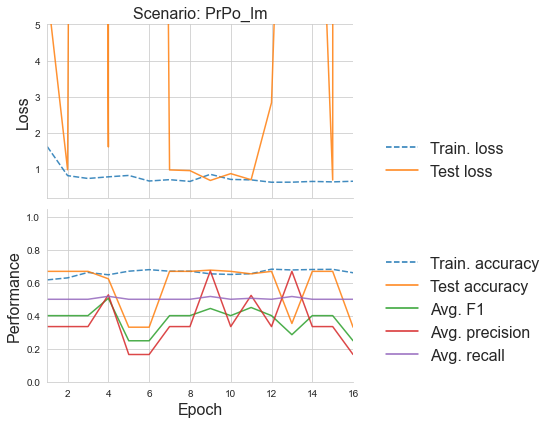

In [28]:
RESNET_PATIENCE_7_TESTING_MODE  = "../../results/test-opt-cnn-performance-metrics-summary-resnet50-w-252-px-h252-px-patience-7-12-Aug-2021-16-55-48.csv"
plotCNNPerformanceMetrics(RESNET_PATIENCE_7_TESTING_MODE)

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,val_f1,val_recall,val_precision,Scenario,epoch
0,0,1.045355,0.597744,9.548343,0.669173,0.400901,0.500000,0.334586,PrPo_Im,1
1,1,0.697163,0.649436,3.841085,0.669173,0.400901,0.500000,0.334586,PrPo_Im,2
2,2,0.669132,0.649436,1.687887,0.676692,0.424937,0.511364,0.837121,PrPo_Im,3
3,3,0.666787,0.662594,0.934418,0.669173,0.421739,0.505746,0.585878,PrPo_Im,4
4,4,0.594769,0.693609,1.306892,0.676692,0.424937,0.511364,0.837121,PrPo_Im,5
...,...,...,...,...,...,...,...,...,...,...
56,56,0.039458,0.995301,0.915591,0.646617,0.261796,0.322097,0.220513,Pr_Po_Im,10
57,57,0.026857,0.994361,0.932426,0.639098,0.329831,0.351276,0.416667,Pr_Po_Im,11
58,58,0.022854,0.997180,1.202369,0.661654,0.266667,0.329588,0.223919,Pr_Po_Im,12
59,59,0.030378,0.993421,1.026827,0.571429,0.318527,0.339095,0.300611,Pr_Po_Im,13


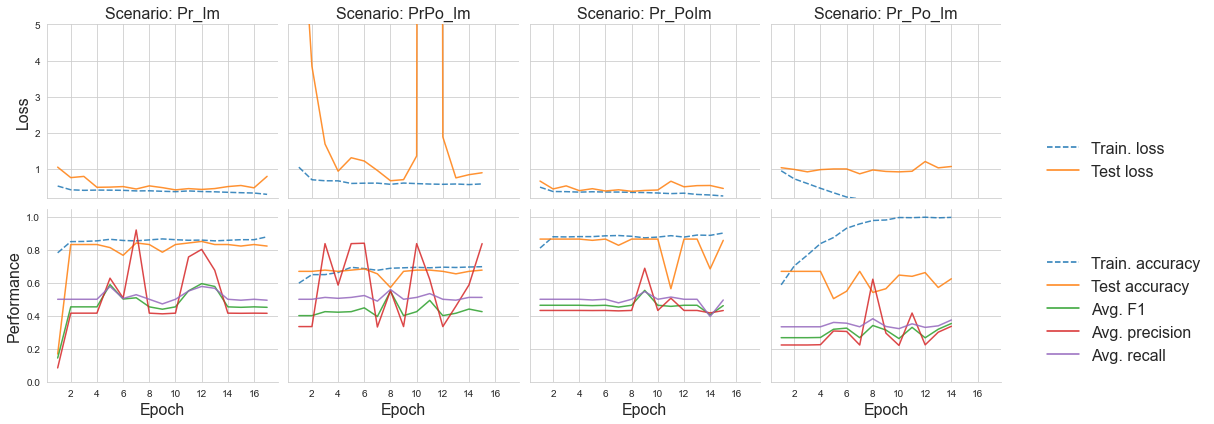

In [3]:
OPT_BASE_7_TESTING_MODE  = "../../results/opt-cnn-performance-metrics-summary-base-w-252-px-h252-16-Aug-2021-20-52-44-px.csv"
plotCNNPerformanceMetrics(OPT_BASE_7_TESTING_MODE)